In [1]:
!rm -rf ojt_bert
!git clone https://github.com/wzwzeyal/ojt_bert

Cloning into 'ojt_bert'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 189 (delta 84), reused 151 (delta 49), pack-reused 0
Receiving objects: 100% (189/189), 6.71 MiB | 26.14 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [2]:
pip install bertopic

In [3]:
import pandas as pd

In [4]:
all_tokens_df = pd.read_csv('./ojt_bert/data/for_topic/all_tokens_df.gz')
all_morphs_df = pd.read_csv('./ojt_bert/data/for_topic/all_morphs_df.gz')


In [6]:
# Bert Topic

In [7]:
from bertopic import BERTopic

In [10]:
all_tokens_df.describe()

,Unnamed: 0,index,label,comment_clean_len,topic_len
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3371.112638,2643.026042,0.332641,78.599297,49.806998
std,1954.268891,1808.555062,0.526000,73.116268,49.799420
min,0.000000,0.000000,0.000000,3.000000,2.000000
25%,1684.500000,848.500000,0.000000,28.000000,15.000000
50%,3361.000000,2542.000000,0.000000,53.000000,32.000000
75%,5061.500000,4218.500000,1.000000,103.000000,66.000000
max,6771.000000,5925.000000,2.000000,493.000000,255.000000


In [35]:
nr_clusters = 5

In [24]:
topic_model = BERTopic(language="hebrew", calculate_probabilities=True, verbose=True, nr_topics=nr_clusters)
clusters, probs = topic_model.fit_transform(all_tokens_df.topic.values)

Batches:   0%|          | 0/196 [00:00<?, ?it/s]

2022-01-17 12:48:35,904 - BERTopic - Transformed documents to Embeddings
2022-01-17 12:48:55,072 - BERTopic - Reduced dimensionality with UMAP
2022-01-17 12:48:59,302 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2022-01-17 12:49:01,238 - BERTopic - Reduced number of topics from 117 to 6


In [30]:
all_tokens_df['cluster'] = clusters

In [130]:
freq = topic_model.get_topic_info(); freq

,Topic,Count,Name
0,-1,4800,-1_אדוני_לנשיא_אמן_איש
1,0,440,0_יהודי_היהודי_יהודים_היהודים
2,1,406,1_ברכות_גאה_מחר_בך
3,2,238,2_יחי_יהי_דמו_ברוך
4,3,214,3_עצוב_ברוך_זכרו_כואב
5,4,161,4_יקר_איש_עלה_והצלח


In [25]:
topic_model.visualize_topics()

In [ ]:
#0: Politics
#1: Greetings
#2: Euloigy
#3: Euloigy
#4: Greetings

In [45]:
codes = {-1: 'Other', 0: 'Politics', 1: 'Greetings', 2: 'Eulogy', 3: 'Eulogy', 4: 'Greetings'}
all_tokens_df['topic_name'] = all_tokens_df['cluster'].map(codes)

In [46]:
all_tokens_df.sample(10)

,Unnamed: 0,index,comment,label,comment_clean,sentiment,comment_clean_len,topic,topic_len,cluster,topic_name
3872,4164,4164,"ברכות חמות כבוד הנשיא ,",0,ברכות חמות כבוד הנשיא,pos,21,ברכות חמות,10,1,Greetings
4457,4801,4801,שבת שלום אדוני הנשיא תתרגל לתואר אתה מכבד אותו יותר מאשר הוא אותך,0,שבת שלום אדוני הנשיא תתרגל לתואר אתה מכבד אותו יותר מאשר הוא אותך,pos,65,אדוני תתרגל לתואר מכבד מאשר,27,-1,Other
6062,6552,626,הלב נקרע העצב ענק,0,הלב נקרע העצב ענק,pos,17,נקרע העצב ענק,13,3,Eulogy
2288,2459,2459,חזק ואמץ כבוד הנשיא . הבריונות והגזענות קשות לטיפול . אך מוכרחים לעשב את הגינה כל הזמן,0,חזק ואמץ כבוד הנשיא הבריונות והגזענות קשות לטיפול אך מוכרחים לעשב את הגינה כל הזמן,pos,82,חזק ואמץ הבריונות והגזענות קשות לטיפול מוכרחים לעשב הגינה,57,-1,Other
2260,2429,2429,אתה אכזבה גדולה רובי !! מה אתה מנסה ללקק להם עכשיו ? אתה יודע בעצמך שזה פוגע בעם היהודי !! היית ...,1,אתה אכזבה גדולה רובי מה אתה מנסה ללקק להם עכשיו אתה יודע בעצמך שזה פוגע בעם היהודי היית מאשר לבי...,neg,203,אכזבה מנסה ללקק בעצמך פוגע בעם היהודי היית מאשר לביתך נשואים צבוע משקר העם בתגובה החתונה הערב,93,-1,Other
5656,6105,179,הלוואי והיו כמוך עוד רבים .... דרך צלחה ..,0,הלוואי והיו כמוך עוד רבים דרך צלחה,pos,34,הלוואי והיו כמוך רבים צלחה,26,-1,Other
3306,3557,3557,תתבייש אתה . גם גברת פרנקל היקרה שיבחה את אבו מאזן . אז אולי תתקוף אותה גם ?,1,תתבייש אתה גם גברת פרנקל היקרה שיבחה את אבו מאזן אז אולי תתקוף אותה גם,neg,70,תתבייש גברת פרנקל היקרה שיבחה אבו מאזן תתקוף,44,0,Politics
3664,3945,3945,מיטן ראכטן פיס אדוני הנשיא ובתרגום מיידיש עם רגל ימין . כיציאה לדרך צלחה לליגה ולך כבודו,0,מיטן ראכטן פיס אדוני הנשיא ובתרגום מיידיש עם רגל ימין כיציאה לדרך צלחה לליגה ולך כבודו,pos,86,מיטן ראכטן פיס אדוני ובתרגום מיידיש ימין כיציאה צלחה לליגה ולך כבודו,68,2,Eulogy
580,611,611,"אהוד אולמרט : היה ראש ממשלה ואוהד בית""ר ביבי נתניהו : ראש ממשלה ואוהד בית""ר ראובן ריבלן : הנשיא...",1,"אהוד אולמרט היה ראש ממשלה ואוהד בית""ר ביבי נתניהו ראש ממשלה ואוהד בית""ר ראובן ריבלן הנשיא ואוהד ...",neg,202,"אהוד אולמרט ממשלה ואוהד בית""ר ביבי נתניהו ממשלה ואוהד בית""ר ראובן ריבלן ואוהד בית""ר נישלטת ידי ב...",134,-1,Other
2786,2998,2998,ולי יש חלום שיהיה נשיא למדינת היהודים שמתנגד להתבוללות . ריבלין - אתה לא הנשיא שלנו .,1,ולי יש חלום שיהיה נשיא למדינת היהודים שמתנגד להתבוללות ריבלין אתה לא הנשיא שלנו,neg,79,ולי למדינת היהודים שמתנגד להתבוללות,35,0,Politics


In [129]:
group_by_sentiment = all_tokens_df.groupby('topic_name')['sentiment'].value_counts(normalize=True)

sentiment,neg,nut,pos
topic_name,,,
Eulogy,0.163717,0.033186,0.803097
Greetings,0.029982,0.003527,0.966490
Other,0.275625,0.029792,0.694583
Politics,0.740909,0.025000,0.234091


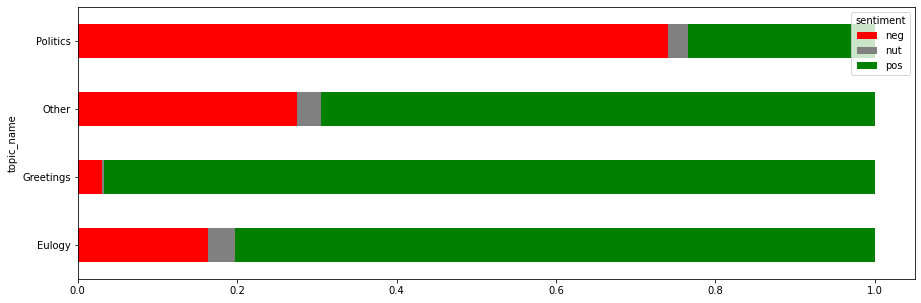

In [128]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)
group_by_sentiment.unstack().plot.barh(stacked=True, color=['red', 'gray', 'green'] );


In [47]:
all_tokens_df.head()

,Unnamed: 0,index,comment,label,comment_clean,sentiment,comment_clean_len,topic,topic_len,cluster,topic_name
0,0,0,ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער,0,ממש כואב אני בוכה עם המשפחה שלא תדעו עוד צער,pos,44,כואב בוכה המשפחה תדעו צער,25,-1,Other
1,1,1,כל הכבוד והמון בהצלחה,0,כל הכבוד והמון בהצלחה,pos,21,והמון,5,-1,Other
2,2,2,"תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל",0,תל חי רובי בכל העצב הזה היית קרן אור של תקוה אכן יש נשיא בישראל,pos,63,תל חי העצב היית אור תקוה אכן בישראל,35,-1,Other
3,3,3,נקי כפיים ובר לבב בהצלחה לך ולנו .,0,נקי כפיים ובר לבב בהצלחה לך ולנו,pos,32,נקי כפיים ובר לבב ולנו,22,-1,Other
4,4,4,רובי חג שמח והצלחה בבחירות לנשיאות .,0,רובי חג שמח והצלחה בבחירות לנשיאות,pos,34,חג והצלחה בבחירות לנשיאות,25,-1,Other


In [26]:
topic_model.visualize_distribution(probs[100], min_probability=0.005)

In [27]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [28]:
topic_model.visualize_barchart(top_n_topics=9)

In [31]:
pd.options.display.max_colwidth=100
  

In [39]:
for cluster_number in range(nr_clusters):
  rep_docs = topic_model.get_representative_docs(cluster_number)[:5]
  display(all_tokens_df[all_tokens_df['topic'].isin(rep_docs)][['comment', 'cluster']])

,comment,cluster
57,"הכנסת בחרה בבחירת העם . תושבי דימונה מאחלים לך הצלחה רבה , בריאות וכוחות , תישאר רגיש ומרגש , ע...",0
246,"כבוד הנשיא עדיף שתשתוק זה לא נותן כבוד גדול לתמוך בנישואים של יהודיה ומוסלמי , בטח לא בימים כאל...",0
2463,יפה שאתה מנסה להסתיר את המציאות שבה אין אפשרות חוקית בישראל להתחתן אם בני הזוג איתרע מזלם להוולד...,0
3146,ברק אנחנו יהודים שמבינים מה המשמעות של להיות יהודי,0
5924,ביום הבחירות התפללתי שרובי רבלין יבחר.בסוף התברר שהוא אפס מאופס.בושה לעם היהודי.מתביש בך יאפס.מת...,0


,comment,cluster
231,גאים בך בהצלחה !,1
496,גאים בך רובי אחד משלנו איש העם,1
2571,"האנושיות שבך היא זו שמבדילה אותך מכל היתר . שמחה על בחירתך , שמחה בשמחתך : )",1
2701,כל הכבוד כבוד הנשיא גאים בך,1
4309,איזהה נשיא !! אשרייך,1
5966,בהצלחה רבה ושתדע ושנדע גם אנחנו ימים טובים ומאושרים,1


,comment,cluster
1123,"יהי זכרם ברוך , ה ׳ יקום דמם",2
1563,"רובי בהצלחה , שמח על בחירתך . שלך אילן משיחא יר זנבר יו ״ ר מפלגת מורשת אבות . ( איזה רשמיות ) ...",2
1631,"אני מקווה שצה""ל יקום דמם !",2
2311,"אודי אמסלם , בן של מלך , קורים פה דברים איומים בעולם . תעשה טובה , דבר עם אבא ...",2
4114,"קשה מאוד , קשה מאוד להכיל דבר כזה , ה' יקום דמו .",2


,comment,cluster
953,עצוב כואב !!!!,3
982,פשוט זעיר כמה עצוב השם ישמור,3
2138,אופ כמה עצוב .. לא רוצה לכצוב את זה שוב .... תעשו שייגמר כבר .. כמה חמוד הוא : (,3
2712,איזה עצב הלב נקרע,3
3417,"כל כך עצוב : ( , יהי זכרו ברוך .",3
4512,עצוב . הלב כואב,3
4624,עצוב .... יהי זכרו ברוך,3
5388,עצוב יהי זכרו ברוך,3


,comment,cluster
18,אם יש מישהו שמגיעה לו זה אתה..בהצלחה,4
206,עלה והצלח מגיע לך להיות נשיא מדינת ישראל,4
3230,שבת שלום !!! עלה והצלח,4
3386,אוהבים אתך בהצלח,4
3558,עלה והצלח !,4
5108,חרפה היא הלחם והמלח בימים אלו .,4
5465,שבת שלום תצליח אתה תהיה הנשיא,4
5655,מזל טובבבבבבבבב עלה והצלח,4
5773,עלה והצלח .,4


In [38]:
for cluster_number in range(nr_clusters):
  display(all_tokens_df[all_tokens_df.cluster == cluster_number].sample(5)[['comment', 'cluster']]) 

,comment,cluster
2551,{ כא } הֲלוֹא מְשַׂנְאֶיךָ יְהוָה אֶשְׂנָא וּבִתְקוֹמְמֶיךָ אֶתְקוֹטָט : { כב } תַּכְלִית שִׂנְא...,0
5051,נשיא לא חיב תמיד להגיד את דעתו . שתיקתו היתה מכבדת אותו יותר.מצטערת על הגושפנקא שהענקת להם ומי י...,0
3028,אני אתן להן ??!! מי אני בכלל שאגיד למישהי שתתחתן עם יהודי או דת אחרת ! אבל זה יקרה בדורות הבאים...,0
4560,"כבוד הנשיא הנבחר , אתה ידוע כאיש אמת . האמת ידועה : אבומאזן ימח שמו ידיו מלאות דם יהודי והוא ממ...",0
5811,מתביישים בך !!!,0


,comment,cluster
2695,"תודה רבה לכם על התגובות , מרגש : )",1
386,"אני שמחה מאוד על בחירתך , יש בך איזון נכון בין רגש , הומור וערכים טובים .",1
1258,קיבלת את התפקיד שאין לו ראוי ממך היכולת שלך להיות נטרלי לקבל לכבד ולאהוב את כולם היא הגאווה לתפקידך,1
5124,הצלחה בתפקידך החדש כבוד לנו אבל .. הייתי ממעדיפה אותך כראש הממשלה הבא כי אין לנו אנשים נוספים כמ...,1
3493,"מאושרת שאתה נבחרת , לכבוד הוא לנו כנשיא מדינת ישראל",1


,comment,cluster
6087,סחתיין נשיא,2
236,זה היה ברור מאליו יחי ראובן רבלין נשיא מדינת ישראל בהצלחה רבה ביבי תפרגן לו מגיע לו,2
3480,שבת שלום ומבורך . יפה שמצאתה זמן לפייסלנד,2
3835,אוי רובי איזה מתייפייף ... כאילו שאתה לא יודע שתוך שנתיים-שלוש הילדה הנואשת הזו תתחנן בטלפון בהח...,2
3530,השם ינקום דמו,2


,comment,cluster
2138,אופ כמה עצוב .. לא רוצה לכצוב את זה שוב .... תעשו שייגמר כבר .. כמה חמוד הוא : (,3
548,עצוב ביותר יהי זכרך ברוך ילד מלאך טהור שלנו שמור מלמעלה על עמיתיך ישראל ושמך דניאל זועקת בקול שמ...,3
4069,עצוב בנשמה !,3
5026,כמה כואב .....,3
1593,אוי כמה כואב בלב !,3


,comment,cluster
5655,מזל טובבבבבבבבב עלה והצלח,4
1145,באמת אהבתי אותך .... כמה חבל ..,4
2818,בהצלחה איש יקר וענק אוהבים אותך 👍🌹🌹🌹🌹,4
770,שבת שלום רובי נשיא יקר !!!,4
4240,רפול היה גבר שבגברים רק הים יכל לו,4


In [131]:
topic_model = BERTopic(language="hebrew", calculate_probabilities=True, verbose=True, nr_topics=nr_clusters)
clusters, probs = topic_model.fit_transform(all_morphs_df.topic.values)

Batches:   0%|          | 0/197 [00:00<?, ?it/s]

2022-01-17 14:44:52,134 - BERTopic - Transformed documents to Embeddings
2022-01-17 14:45:10,831 - BERTopic - Reduced dimensionality with UMAP
2022-01-17 14:45:14,909 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2022-01-17 14:45:16,742 - BERTopic - Reduced number of topics from 117 to 6


In [133]:
topic_model.visualize_topics()

In [135]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [140]:
topic_model.visualize_barchart(top_n_topics=9)

In [137]:
all_morphs_df['cluster'] = clusters

In [139]:
for cluster_number in range(nr_clusters):
  rep_docs = topic_model.get_representative_docs(cluster_number)[:5]
  display(all_morphs_df[all_morphs_df['topic'].isin(rep_docs)][['comment', 'cluster']])

,comment,cluster
1,איש יקר של אנחנו,0
370,מקסים ביותר !,0
642,ב ה הצלחה איש יקר .,0
1488,פשוט מקסים !!!,0
1754,מקסים !,0
1828,אין אתה מקסים !!!,0
2242,ב ה הצלחה איש יקררר,0
2244,"מקסים .... ב הצלחה ו מזל טוב , ה נשיא !",0
2323,מזל טוב איש יקר !,0
2553,ב ה הצלחה איש יקר ה נשיא של עם ישראל ה בא,0


,comment,cluster
403,ל עניות דעתי כבוד ה נשיא לא צריך היה להגיב כלל ! דברי חכמה אין כאן ! אנו יהודים ו על אנחנו לנסו...,1
1137,בושה ש את היא נשיא של אנחנו ... ש תמות !!!!!,1
2124,פשוט בושה ש אתה נשיא של עם ישראל לא מגיע ל ה גברים של ש מעון,1
3956,ראדי לא יהיה ב מכבי רק יהודים ב מכבי,1
4469,זה לא נשיא של מדינה יהודית .,1


,comment,cluster
383,"רובי , אתה ראוי !!!!!!!!!",2
1295,ב ה הצלחה מגיע ל אתה אתה הכי ראוי מ כולם .,2
1945,ב ה הצלחה רובי ! מגיע ל אתה ו אתה ראוי !,2
2066,מזל טוב אתה ראוי ל כך,2
2617,ב ה הצלחה . אין ראוי מן אתה .,2
2957,"ש יהיה ב הצלחה , אתה ה ראוי מ כולם",2
3081,ב הצלחה רבה ! אתה ה נשיא ה ראוי ל אנחנו !,2
3320,המון הצלחה אתה ראוי ל זה !!,2
3429,"אתה ה ראוי ביותר , תודה !!",2
3659,"ממש מרגש ! ניכר ש זכיתם אחד ב שניה , נקווה ש גם עם ישראל יזכה מחר ב נשיא ראוי , מייצג ו מאחד את...",2


,comment,cluster
394,"מילים מרגשות מאוד , ב הצלחה ב בחירות ל נשיאות .",3
2731,מזל ש אף אחד לא באמת מקשיב ל מוסד ה נשיאות,3
3716,מגיע ל אתה כל ה כבוד נשיאנו ה יקר . למרות ו חרף ה מצב ה מלחמתי יצאת ללוות ל מנוחת עולם את דניאל...,3


,comment,cluster
255,"רובי ריבלין נשיא מדינת ישראל זה עתה ישראל מתחילה לשלם את מחיר עיסקת גלעד שליט , יש לשנות את ה מ...",4
2645,עדיף ש לא הייתה מתערב ב זה בושה ש יש ל אנחנו נשיא כמו אתה יזבל אני מאחל ל אתה ש כל ה נכדים ו ה נ...,4
4720,חס ו שלום עלאק דם ערבי זרה את הם בעורקיי חחחחחחח מ איפה הבאת תחרטוט ה זה ? ה דם של אני יהודי ו ת...,4
4747,ממש נורא ב עיניי . נשיא ה מדינה אולי גם יהיה ל אנחנו נשיא ערבי כי הם מתרבים מה דעתך ? או ראש ממש...,4
5524,"עוד לפני רגע חיילים של אנחנו נלחמו נגדם ו הנה נשיא מדינת ישראל אבל לא של צה""ל תומך ב עזתים ו ב ...",4


In [141]:
codes = {-1: 'Other', 0: 'Greetings', 1: 'Politics', 2: 'Greetings', 3: 'Greetings', 4: 'Politics'}
all_morphs_df['topic_name'] = all_morphs_df['cluster'].map(codes)

In [142]:
group_by_sentiment = all_morphs_df.groupby('topic_name')['sentiment'].value_counts(normalize=True)

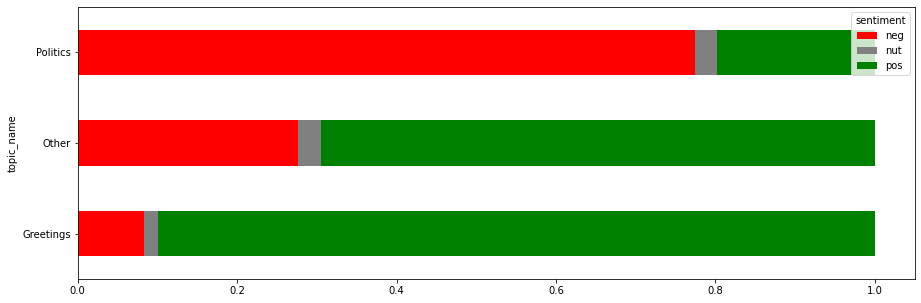

In [143]:
group_by_sentiment.unstack().plot.barh(stacked=True, color=['red', 'gray', 'green'] );